# Easily export jupyter cells to python module
https://github.com/fastai/course-v3/blob/master/nbs/dl2/notebook2script.py

In [ ]:
! python /tf/src/scripts/notebook2script.py visualization.ipynb

In [38]:
%matplotlib inline

In [ ]:
! pip install -U scikit-learn

In [39]:
#export
from exp.nb_clustering import *
from exp.nb_evaluation import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cmx
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

In [40]:
cd /tf/src/data/features

/tf/src/data/features


# Generate all the feature vectors
(Skip if already done)


In [ ]:
embdr = D2VEmbedder("/tf/src/data/doc2vec/model")

In [ ]:
# Generate and Save Human Features
hman_dict = embdr("/tf/src/data/methods/DATA00M_[god-r]/test")

with open('hman_features.pickle', 'wb') as f:
    pickle.dump(hman_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Generate and Save GPT-2 Pretrained Features
m1_dict = embdr("/tf/src/data/samples/unconditional/m1_example")

with open('m1_features.pickle', 'wb') as f:
    pickle.dump(m1_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

# Read in Feature Vectors

In [42]:
models_path = "/tf/src/data/features/output_space"
models_features = load_features(models_path)

In [ ]:
len(models_features[0]), len(models_features[1])

# Visualize Features

In [41]:
models_clusters = cluster(models_features, k_range = [2, 3, 4, 5])

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.777046
[t-SNE] KL divergence after 300 iterations: 1.012308
Best K was 3 with a silhouette score of 0.3144027
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.317398
[t-SNE] KL divergence after 300 iterations: 1.091230
Best K was 3 with a silhouette score of 0.31984097


In [ ]:
_, _, _, kmeans = models_clusters[1]

In [ ]:
kmeans.n_clusters

In [ ]:
def setup_data(model):
    feature_vectors, _, centroids, kmeans = model
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = feature_vectors[:, 0].min() - 1, feature_vectors[:, 0].max() + 1
    y_min, y_max = feature_vectors[:, 1].min() - 1, feature_vectors[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    return feature_vectors, centroids, xx, yy, Z

In [ ]:
def plot_features(models_clusters):
    plt.figure(figsize=(12, 8))
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(2, 2)
    plt.clf()
    for i, model in enumerate(models_clusters):
        # Setup data to be plotted
        feature_vectors, centroids, xx, yy, Z = setup_data(model)
        
        # Plot data
        plt.subplot(gs[0, i])
        plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

        plt.plot(feature_vectors[:, 0], feature_vectors[:, 1], 'k.', markersize=2)
        # Plot the centroids as a white X
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='w', zorder=10)
        plt.title('K-means clustering\n'
                  '(PCA & T-SNE - reduced data)\n'
                  'Centroids are marked with white cross')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        
    plt.subplot(gs[1, :])
    colmap = {0: 'b.', 1: 'r.'}
    plt.title('Blue denotes Human Methods and Red denotes GPT-2 Unconditional Samples')
    for i, model in enumerate(models_clusters):
        feature_vectors, _, _, _ = model
        plt.plot(feature_vectors[:, 0], feature_vectors[:, 1], colmap[i], markersize=10)
#         plt.xticks(())
#         plt.yticks(())
    plt.show()

In [ ]:
plot_features(models_clusters)

# Gaussian Mixture Visualization

In [ ]:
def 

## Visualize 1D

In [ ]:
models_clusters = cluster(models_features, k_range = [2, 3, 4, 5], dims = 1)

In [ ]:
dims = 2
for model in models_clusters:
    feature_vectors, _, _, kmeans = model
    print(feature_vectors.shape)
#     feature_vectors = reduce_dims(feature_vectors, dims)
    gmm = generate_distributions(feature_vectors, kmeans.n_clusters)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = np.linspace(-10, 10, 1000).reshape(1000,1)
    logprob = gmm.score_samples(x)
    pdf = np.exp(logprob)
    #print np.max(pdf) -> 19.8409464401 !?
    ax.plot(x, pdf, '-k')
    plt.show()

## Visualize 2D

In [5]:
dims = 2
models_clusters = cluster(models_features, k_range = [2, 3, 4, 5], dims = dims)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.118752
[t-SNE] KL divergence after 300 iterations: 1.082613
Best K was 3 with a silhouette score of 0.31492692
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.002884
[t-SNE] KL divergence after 300 iterations: 0.953365
Best K was 3 with a silhouette score of 0.31389922


In [21]:
# From http://www.itzikbs.com/gaussian-mixture-model-gmm-3d-point-cloud-classification-primer
def visualize_2D_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 2D
    Input: 
        points: N X 2, sampled points
        w: n_gaussians, gmm weights
        mu: 2 X n_gaussians, gmm means
        stdev: 2 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''
    n_gaussians = mu.shape[1]
#     print(n_gaussians)
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = plt.gca()
#     axes.set_xlim([-100, 1])
#     axes.set_ylim([-1, 1])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
#         if 
        idx = range(i * N, (i + 1) * N)
        plt.scatter(points[idx, 0], points[idx, 1], alpha=0.3, c=colors[i])
        for j in range(8):
#             print(stdev.shape, stdev[0, i], stdev[1, i])
            axes.add_patch(
                patches.Ellipse(mu[:, i], width=(j+1) * stdev[0, i], height=(j+1) *  stdev[1, i], fill=False, color=[0.0, 0.0, 1.0, 1.0/(0.5*j+1)]))
        plt.title('GMM')
    plt.xlabel('X')
    plt.ylabel('Y')

    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/2D_GMM_demonstration.png', dpi=100, format='png')

    plt.show()

In [14]:
feature_vectors, _, _, kmeans = models_clusters[1]
gmm = generate_distributions(feature_vectors, kmeans.n_clusters)

In [ ]:
feature_vectors.shape

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


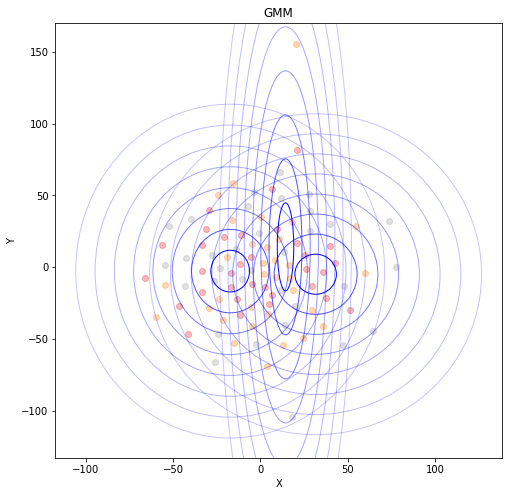

In [22]:
visualize_2D_gmm(feature_vectors, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)

In [16]:
def plot_2d(models_clusters):
    plt.figure(figsize=(12, 8))
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(1, 2)
    plt.clf()
    for i, model in enumerate(models_clusters):
        # Setup data to be plotted
        feature_vectors, _, _, kmeans = model
        gmm = generate_distributions(feature_vectors, kmeans.n_clusters)
        
        # Plot data
        plt.subplot(gs[0, i])
        # display predicted scores by the model as a contour plot
        delta = 30.
        x = np.linspace(feature_vectors[:, 0].min() - delta, feature_vectors[:, 0].max() + delta)
        y = np.linspace(feature_vectors[:, 1].min() - delta, feature_vectors[:, 1].max() + delta)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -gmm.score_samples(XX)
        Z = Z.reshape(X.shape)

        CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                         levels=np.logspace(1, 2, 10))
        CB = plt.colorbar(CS, shrink=0.8, extend='both')
        plt.scatter(feature_vectors[:, 0], feature_vectors[:, 1], .8)

        plt.title('Negative log-likelihood predicted by a GMM')
        plt.axis('tight')
        
    plt.show()

In [ ]:
plot_2d(models_clusters)

In [17]:
feature_vectors, _, _, kmeans = models_clusters[0]
gmm = generate_distributions(feature_vectors, kmeans.n_clusters)

In [18]:
feature_vectors.shape, kmeans.n_clusters

((100, 2), 3)

In [ ]:
feature_vectors[:, 0].max(), feature_vectors[:, 1].min()

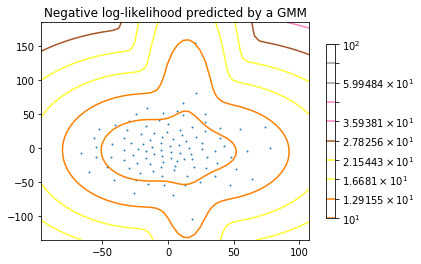

In [19]:
n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
# clf = GaussianMixture(n_components=2, covariance_type='full')
# clf.fit(X_train)

# display predicted scores by the model as a contour plot
delta = 30.
x = np.linspace(feature_vectors[:, 0].min() - delta, feature_vectors[:, 0].max() + delta)
y = np.linspace(feature_vectors[:, 1].min() - delta, feature_vectors[:, 1].max() + delta)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(1, 2, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(feature_vectors[:, 0], feature_vectors[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

## Visualize 3D

In [44]:
dims = 3
models_clusters = cluster(models_features, k_range = [2, 3, 4, 5], dims = dims)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 164.888199
[t-SNE] KL divergence after 300 iterations: 3.733660
Best K was 2 with a silhouette score of 0.77461207
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 137.452911
[t-SNE] KL divergence after 300 iterations: 2.713771
Best K was 2 with a silhouette score of 0.79901016


In [23]:
# From http://www.itzikbs.com/gaussian-mixture-model-gmm-3d-point-cloud-classification-primer
def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input: 
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.2, linewidth=1)

    return ax

In [36]:
# From http://www.itzikbs.com/gaussian-mixture-model-gmm-3d-point-cloud-classification-primer
def visualize_3d_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 3D
    Input: 
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111, projection='3d')
#     axes.set_xlim([-1, 1])
#     axes.set_ylim([-1, 1])
#     axes.set_zlim([-1, 1])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('3D GMM')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)
#     if export:
#         if not os.path.exists('images/'): os.mkdir('images/')
#         plt.savefig('images/3D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()

In [52]:
feature_vectors, _, _, kmeans = models_clusters[0]
gmm = generate_distributions(feature_vectors, 2)
kmeans.n_clusters

2

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


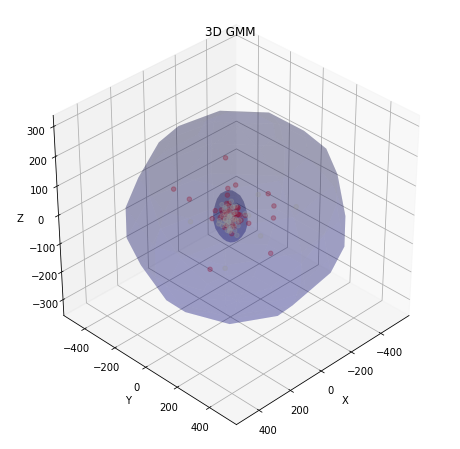

In [53]:
visualize_3d_gmm(feature_vectors, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature_vectors[:, 0], feature_vectors[:, 1], feature_vectors[:, 2])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, Y = X, Y = np.mgrid[-1:1:30j, -1:1:30j] #np.mgrid[-100:100:30j, -100:100:30j]
XX = np.array([X.ravel(), Y.ravel()]).T
# Z = -gmm.score_samples(XX)
Z = np.sin(np.pi*X)*np.sin(np.pi*Y)
# ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
# ax.contour(X, Y, Z, 100, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
CS = ax.contour(X, Y, Z, 20, lw=3, colors="k", linestyles="solid", norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(1, 2, 10))
CB = ax.colorbar(CS, shrink=0.8, extend='both')
plt.show()